In [4]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import scipy
import math

In [2]:
class Bernoulli:
    """
    The Bernoulli distribution is a discrete probability distribution of a random variable.
    The distribution has the value 1 with probability p and the value 0 with q = 1-p. 
    The Bernoulli is identical to the binomial distribution with n=1.
    One example of a Bernoulli distribution is a coin toss.
    """
    
    def __init__(self, p: float):
        assert isinstance(p, float)
        assert 0 <= p <= 1
        self.p = p
    
    def generate_random(self):
        """Return a random variable from a Bernoulli distribution"""
        random_float = random.random()
        return 1*(random_float < self.p) + 0
    
    def expected_value(self):
        """Return the expected value of a Bernoulli distribution"""
        return self.p
    
    def variance(self):
        """Return the variance of a Bernoulli distribution"""
        return self.p*(1-self.p)
    

In [3]:
class Geometric:
    """
    The geometric distribution is a distribution of n Bernoulli(p) trials required to get one success. In other words,
    there are n-1 Bernoulli failures before one Bernoulli success. The support is X = {1,2,3,...}.

    An example of a geometric distribution is the number of times a die must be thrown until a particular value occurs,
    which would be geometric(0.6)
    """
    
    def __init__(self, p: float):
        assert isinstance(p, float)
        assert 0 <= p <= 1
        self.p = p
    
    def generate_random(self):
        """Return a random variable from a Geometric distribution"""
        U = random.random()
        
        # the CDF is 1-(1-p)^floor(x)
        # the inverse of the CDF is log_(1-p) of (-U-1) = x
        # given the distribution of U-1 is the same as the distribution of U and 
        # given ln(x)/ln(y) = log_y(x) we can simplify to
        # x = ln(U)/ln(1-p) + 1

        x = np.log(U) / np.log(1-self.p)
        return int(np.floor(x)+1) 
    
    def expected_value(self):
        """Return the expected value of a Geometric distribution"""
        return 1/self.p
    
    def variance(self):
        """Return the variance of a Geometric distribution"""
        return (1-self.p) / (self.p)**2

In [4]:
class Exponential:
    """
    The exponential distribution is the distribution of the distance between events in a Poisson counting process.

    An example of an exponential distribution is inter-arrival times in a queue.

    The support (lambda), which represents the average distence between Poisson events, falls between 0 and infinity
    """
    
    def __init__(self, lambda_param: float):
        assert isinstance(lambda_param, (float, int))
        assert 0 < lambda_param
        self.lam = lambda_param
        # note that we don't want to say "lambda" alone since python uses this for defining lambda functions :)
    
    def generate_random(self):
        """Return a random variable from an exponential distribution"""
        
        # the CDF is 1-exp(-lambda * x)
        # so the inverse is X = (-1/lambda)ln(1-U) which is equivalent to (-1/lambda)ln(U)

        U = random.random()
        x = (-1 / self.lam) * np.log(U)
        return x
    
    def expected_value(self):
        """Return the expected value of an exponential distribution"""
        return 1/self.lam
    
    def variance(self):
        """Return the variance of an exponential distribution"""
        return 1/(self.lam**2)

In [5]:
class Uniform:
    """
    The continuous uniform distribution is bounded by the parameters [a,b]. As this distribution is uniform,
    the PDF is 1/(b-a) for a<= x <=b and 0 elsewhere; in other words, the probability distribution is equal for anywhere
    in the range between a and b
    """
    
    def __init__(self, a: float, b: float):
        assert isinstance(a, (float, int))
        assert isinstance(b, (float, int))
        assert 0 < a < b
        self.a = a
        self.b = b
    
    def generate_random(self):
        """Return a random variable from a uniform distribution"""
        
        U = random.random()
        x = self.a + (self.b-self.a)*U
        return x
    
    def expected_value(self):
        """Return the expected value of a uniform distribution"""
        return (self.a + self.b) / 2
    
    def variance(self):
        """Return the variance of a uniform distribution"""
        return ((self.b - self.a) ** 2) / 12

In [6]:
class Weibull:
    """
    The Weibull distribution primarily models time between events, particularly time to failure.

    The Weibull distribution takes two parameters, alpha and beta:
    - lambda is the "shape" parameter
    - k is the "scale" parameter

    For lambda < 1, event rate (e.g. failures) decreases over time, e.g. modeling defects that fail early
    For lambda = 1, event rate is static over time
    For lambda > 1, event rate increases over time, e.g. modeling parts wearing out
    """
    
    def __init__(self, lam: float, k: float):
        assert isinstance(lam, (float, int))
        assert isinstance(k, (float, int))
        assert 0 < lam
        assert 0 < k
        self.lam = lam
        self.k = k
    
    def generate_random(self):
        """Return a random variable from a Weibull distribution"""
        # X = λ * [-ln(U)] ^ (1/k)
        U = random.random()
        x = self.lam * (-np.log(U))**(1/self.k)
        return x
    
    def expected_value(self):
        """Return the expected value of a Weibull distribution"""
        # E[X] = λ * Γ(1 + 1/k)
        return self.lam * math.gamma(1 + 1/self.k)
    
    def variance(self):
        """Return the variance of a Weibull distribution"""
        # Var(X) = λ^2 * (Γ(1 + 2/k) - Γ(1 + 1/k)^2)
        return (self.lam ** 2) * ( math.gamma(1+2/self.k ) - math.gamma(1+1/self.k)**2  ) 

In [18]:
class Triangular:
    """The symmetrical triangular distribution is a continuous probability distribution with lower bound a, and upper bound b.
    The distribution is shaped like a triangle - the pdf approaches zero at a and b, and is at its highest at (b-a)/2.
    This distribution can be modeled as the sum of two uniform distributions.
    
    The distribution is sometimes used when the underlying population distribution is not well known, but upper and lower bound estimates are available"""

    def __init__(self, a: float, c: float, b: float):
        assert isinstance(a, (float, int))
        assert isinstance(b, (float, int))
        assert isinstance(c, (float, int))
        assert(a < c < b)
        self.a = a
        self.b = b
        self.c = c
    
    def generate_random(self):
        
        U = random.random()

        threshold = (self.c - self.a) / (self.b - self.a)
        if U < threshold:
            x = self.a + np.sqrt((self.b-self.a)*(self.c-self.a)*U)
        elif U >= threshold:
            x = (self.b) - np.sqrt((self.b-self.a)*(self.b-self.c)*(1-U))
        return x
    
    def expected_value(self):
        return (self.a+self.b+self.c)/3
    
    def variance(self):
        var = (self.a**2 + self.b**2 + self.c**2 
               - self.a*self.b  - self.a*self.c - self.b*self.c) / 18
        return var
    


In [29]:
class Normal:
    """Docstring"""

    def __init__(self, mu: float, var: float):
        assert isinstance(mu, (float, int))
        assert isinstance(var, (float, int))
        assert var != 0
        self.mu = mu
        self.var = var
        self.sigma = np.sqrt(var)
    
    def generate_random(self):
        
        while True:
            U1 = random.random()
            U2 = random.random()

            V1 = (2*U1-1)
            V2 = (2*U2-1)

            W = V1**2 + V2**2

            if W <=1:
                break
        
        Y = np.sqrt(-2 * np.log(W)/W)

        Z = V1*Y

        return self.mu + self.sigma*Z
    
    def expected_value(self):
        return self.mu
    
    def variance(self):
        return self.var
    
    

In [31]:
class Erlang:
    """Docstring"""

    def __init__(self, k: int, lam: float):
        assert isinstance(lam, (float, int))
        assert isinstance(k, int)
        assert 1 <= k <= 100_000_000 # limit k
        assert lam > 0
        self.k = k
        self.lam = lam
    
    def generate_random(self):
        
        arr = np.array([random.random() for _ in range(self.k)])
        prod = np.prod(arr)

        x = (-1/self.lam) * np.log(prod)

        return x
    
    def expected_value(self):
        return self.k / self.lam
    
    def variance(self):
        return self.k / (self.lam**2)
    

In [43]:
er = Erlang(7, 2)

In [44]:
er_list = [er.generate_random() for i in range(100_000)]

<Axes: >

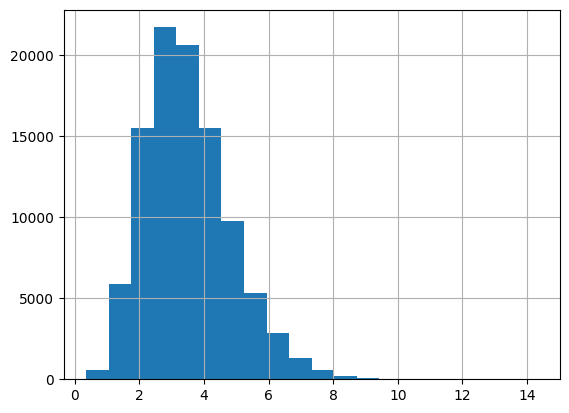

In [45]:
pd.Series(er_list).hist(bins=20)

In [36]:
np.random.

3.9616072987676563

In [27]:
n = [norm.generate_random() for _ in range(1000000)]

<Axes: >

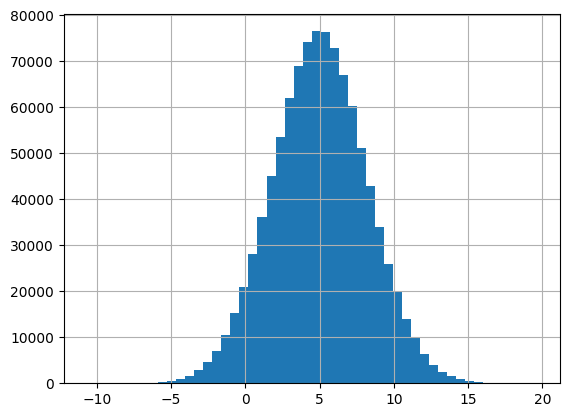

In [28]:
pd.Series(n).hist(bins=50)